In object detection (or object recognition), multiple objects are present in the image. The object locations are represented using a bounding boxes.

In [9]:
import matplotlib.pyplot as plt

In [25]:
img = plt.imread('catdog.jpg')

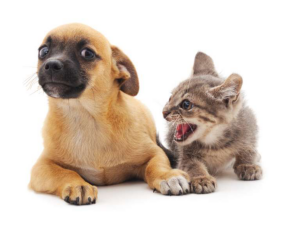

In [26]:
plt.imshow(img)
plt.axis('off')
plt.show()

# Two common ways to represent bounding boxes

In [17]:
def box_corner_to_center(boxes):
    """
    Convert from (upper-left, lower-right) to (center, width, height).
    """
    x1, y1, x2, y2 = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3]
    cx = (x1 + x2) / 2
    cy = (y1 + y2) / 2
    w = x2 - x1
    h = y2 - y1
    boxes = torch.stack((cx, cy, w, h), axis=-1)
    return boxes

In [18]:
def box_center_to_corner(boxes):
    """
    Convert from (center, width, height) to (upper-left, lower-right).
    """
    cx, cy, w, h = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3]
    x1 = cx - 0.5 * w
    y1 = cy - 0.5 * h
    x2 = cx + 0.5 * w
    y2 = cy + 0.5 * h
    boxes = torch.stack((x1, y1, x2, y2), axis=-1)
    return boxes

Example: 

In [19]:
dog_bbox, cat_bbox = [60.0, 45.0, 378.0, 516.0], [400.0, 112.0, 655.0, 493.0]

In [22]:
def bbox_to_rect(bbox, color):
    """
    Convert bounding box to matplotlib format.
    """
    # Convert the bounding box (upper-left x, upper-left y, lower-right x,
    # lower-right y) format to the matplotlib format: ((upper-left x,
    # upper-left y), width, height)
    return plt.Rectangle(
        xy=(bbox[0], bbox[1]), width=bbox[2]-bbox[0], height=bbox[3]-bbox[1],
        fill=False, edgecolor=color, linewidth=2)

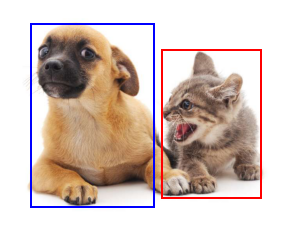

In [24]:
fig = plt.imshow(img)
fig.axes.add_patch(bbox_to_rect(dog_bbox, 'blue'))
fig.axes.add_patch(bbox_to_rect(cat_bbox, 'red'))
plt.axis('off')
plt.show()